In [367]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly_express as px
import math

import numpy as np

import altair as alt
from vega_datasets import data

In [3]:
wta2016df= pd.read_csv('../data/clean/wta_matches_2016.csv')
wta2017df= pd.read_csv('../data/clean/wta_matches_2017.csv')

# Picking between 2016 and 2017 Data Set

In [63]:
wta2016df.shape

(2900, 52)

In [65]:
wta2016df[wta2016df['winner_ht'].isnull()]['winner_name'].count()

118

In [66]:
wta2016df[wta2016df['loser_ht'].isnull()]['loser_name'].count()

314

In [67]:
wta2017df.shape

(2181, 52)

In [68]:
wta2017df[wta2017df['winner_ht'].isnull()]['winner_name'].count()

152

In [69]:
wta2017df[wta2017df['loser_ht'].isnull()]['loser_name'].count()

373

* Because the 2016 season has more entries in its data set and less overall nulls, ___I will use the 2016 data set for this project analysis___.

### Converting Break Points Saved and Faced into a Percentage

In [15]:
wta2016df['l_pctbpSaved']=100*(wta2016df['l_bpSaved']/wta2016df['l_bpFaced'])

In [16]:
wta2016df['w_pctbpSaved']=100*(wta2016df['w_bpSaved']/wta2016df['w_bpFaced'])

In [278]:
wta2016df.to_csv('../data/clean/wtafinalversion2016.csv',index= False)

# Extracting Key Columns

In [17]:
wta2016df.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'winner_rank', 'winner_rank_points', 'loser_id', 'loser_seed',
       'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc',
       'loser_age', 'loser_rank', 'loser_rank_points', 'score', 'best_of',
       'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon',
       'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df',
       'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved',
       'l_bpFaced', 'num_sets', 'l_pctbpSaved', 'w_pctbpSaved'],
      dtype='object')

In [279]:
demo16=wta2016df[['surface','winner_hand', 'winner_ht', 'winner_age','winner_rank','loser_name',
            'loser_hand', 'loser_ht','loser_age', 'loser_rank', 'score','num_sets']]
matchstat16=wta2016df[['w_ace', 'w_df', 'w_1stIn', 'w_1stWon','w_2ndWon', 'w_pctbpSaved', 'l_ace', 'l_df',
                 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_pctbpSaved']]             
ranking16=wta2016df[['winner_rank','loser_rank']] 


demo16.to_csv('../data/clean/demo2016.csv',index= False)
matchstat16.to_csv('../data/clean/matchstatistics2016.csv',index= False)
ranking16.to_csv('../data/clean/wtarankings2016.csv',index= False)

In [247]:
sample16= wta2016df.sample(200)

In [280]:
sample16.to_csv('../data/clean/sample2016.csv',index= False)

# Examining Trends across the Entire Data Set

## _Demographic Data_
* I will use this section to see how the demographic terms are distorted when controlled by a set of different interaction terms __(Court Surface, Number of Sets)__

In [248]:
clay16=sample16[sample16['surface']=='Clay']
hard16=sample16[sample16['surface']=='Hard']
grass16=sample16[sample16['surface']=='Grass']


straightsets16=sample16[sample16['num_sets']==2]
threesets16=sample16[sample16['num_sets']==3]


In [281]:
clay16.to_csv('../data/clean/clay2016.csv',index= False)
hard16.to_csv('../data/clean/hard2016.csv',index= False)
grass16.to_csv('../data/clean/grass2016.csv',index= False)


straightsets16.to_csv('../data/clean/2setmatches2016.csv',index= False)
threesets16.to_csv('../data/clean/3setmatches2016.csv',index= False)

In [249]:
clay16.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,num_sets,l_pctbpSaved,w_pctbpSaved
1148,2016-1068,Nurnberg,Clay,32,I,20160516,270,201696,2,NaN,...,40.0,29.0,10.0,5.0,7.0,1.0,7.0,2,14.285714,NaN
2869,2016-W-FC-2016-WG-PO-RUS-BLR-01,Fed Cup WG R1: RUS vs BLR,Clay,4,D,20160416,3,201458,NaN,NaN,...,82.0,45.0,28.0,13.0,14.0,2.0,10.0,3,20.000000,54.545455
956,2016-1082,Prague,Clay,32,I,20160425,282,206252,NaN,LL,...,47.0,36.0,17.0,6.0,8.0,1.0,5.0,2,20.000000,100.000000
975,2016-1005,Rabat,Clay,32,I,20160425,294,201523,NaN,Q,...,65.0,55.0,33.0,3.0,10.0,1.0,5.0,2,20.000000,60.000000
1279,2016-520,French Open,Clay,128,G,20160523,199,201709,NaN,NaN,...,60.0,43.0,22.0,5.0,7.0,6.0,11.0,2,54.545455,100.000000


#### Age

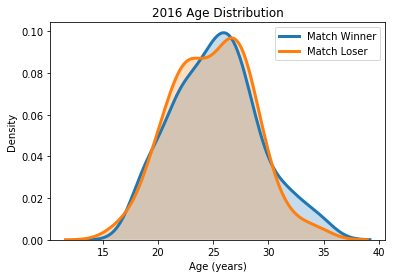

In [250]:
sns.distplot(sample16['winner_age'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(sample16['loser_age'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.show()

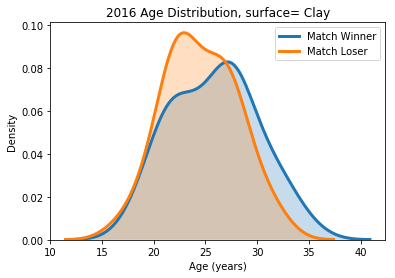

In [251]:
sns.distplot(clay16['winner_age'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(clay16['loser_age'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 Age Distribution, surface= Clay')
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.show()

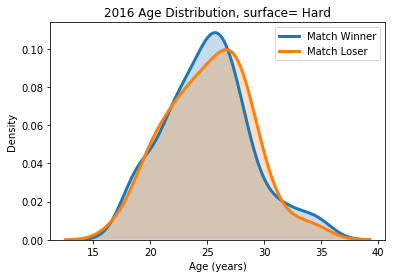

In [252]:
sns.distplot(hard16['winner_age'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(hard16['loser_age'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 Age Distribution, surface= Hard')
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.show()

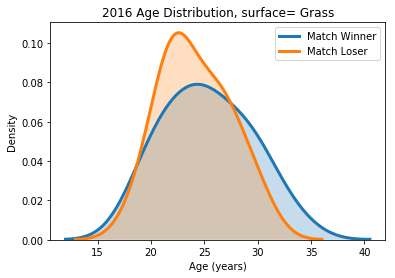

In [253]:
sns.distplot(grass16['winner_age'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(grass16['loser_age'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 Age Distribution, surface= Grass')
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.show()

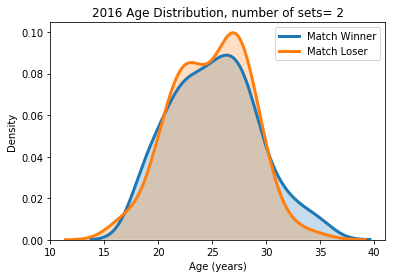

In [254]:
sns.distplot(straightsets16['winner_age'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(straightsets16['loser_age'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 Age Distribution, number of sets= 2')
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.show()

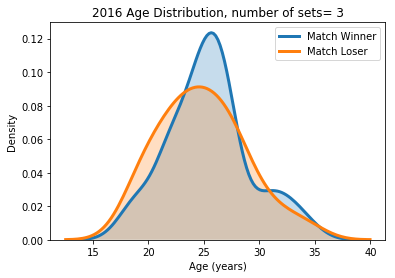

In [255]:
sns.distplot(threesets16['winner_age'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(threesets16['loser_age'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 Age Distribution, number of sets= 3')
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.show()

#### Height

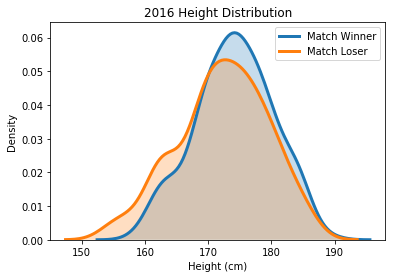

In [256]:
sns.distplot(sample16['winner_ht'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(sample16['loser_ht'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 Height Distribution')
plt.xlabel('Height (cm)')
plt.ylabel('Density')
plt.show()

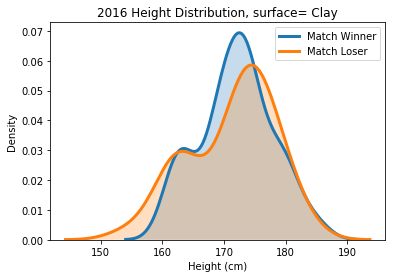

In [257]:
sns.distplot(clay16['winner_ht'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(clay16['loser_ht'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 Height Distribution, surface= Clay')
plt.xlabel('Height (cm)')
plt.ylabel('Density')
plt.show()

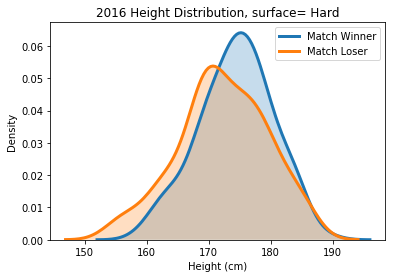

In [258]:
sns.distplot(hard16['winner_ht'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(hard16['loser_ht'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 Height Distribution, surface= Hard')
plt.xlabel('Height (cm)')
plt.ylabel('Density')
plt.show()

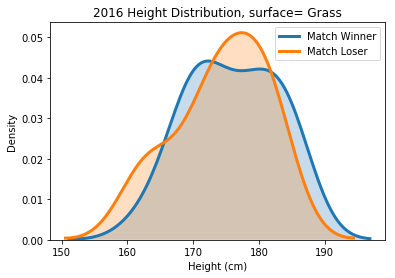

In [259]:
sns.distplot(grass16['winner_ht'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(grass16['loser_ht'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 Height Distribution, surface= Grass')
plt.xlabel('Height (cm)')
plt.ylabel('Density')
plt.show()

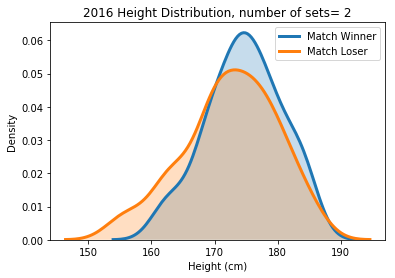

In [260]:
sns.distplot(straightsets16['winner_ht'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(straightsets16['loser_ht'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 Height Distribution, number of sets= 2')
plt.xlabel('Height (cm)')
plt.ylabel('Density')
plt.show()

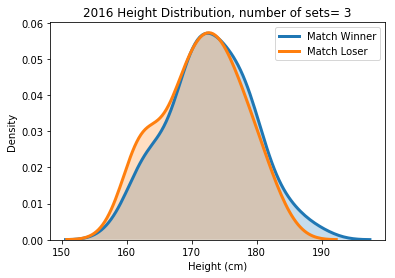

In [261]:
sns.distplot(threesets16['winner_ht'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(threesets16['loser_ht'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 Height Distribution, number of sets= 3')
plt.xlabel('Height (cm)')
plt.ylabel('Density')
plt.show()

#### Handedness

## _Match Statistics_

### Aces

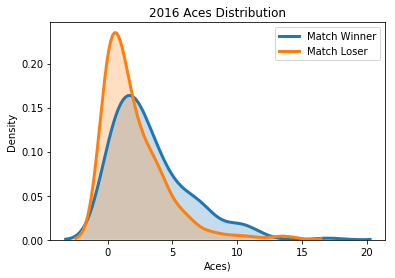

In [262]:
sns.distplot(sample16['w_ace'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(sample16['l_ace'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 Aces Distribution')
plt.xlabel('Aces)')
plt.ylabel('Density')
plt.show()

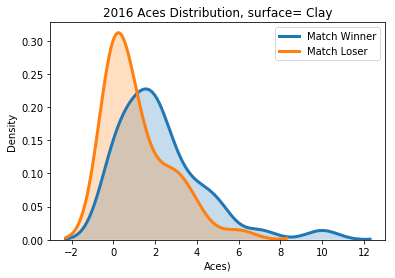

In [264]:
sns.distplot(clay16['w_ace'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(clay16['l_ace'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 Aces Distribution, surface= Clay')
plt.xlabel('Aces)')
plt.ylabel('Density')
plt.show()

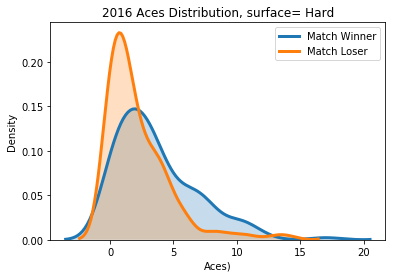

In [265]:
sns.distplot(hard16['w_ace'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(hard16['l_ace'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 Aces Distribution, surface= Hard')
plt.xlabel('Aces)')
plt.ylabel('Density')
plt.show()

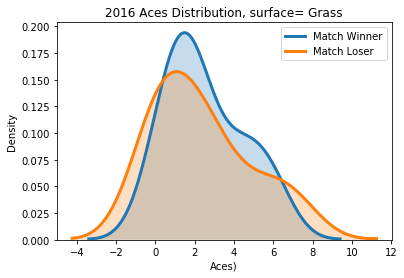

In [266]:
sns.distplot(grass16['w_ace'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(grass16['l_ace'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 Aces Distribution, surface= Grass')
plt.xlabel('Aces)')
plt.ylabel('Density')
plt.show()

### Double Faults

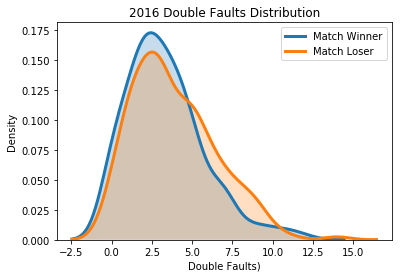

In [267]:
sns.distplot(sample16['w_df'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(sample16['l_df'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 Double Faults Distribution')
plt.xlabel('Double Faults)')
plt.ylabel('Density')
plt.show()

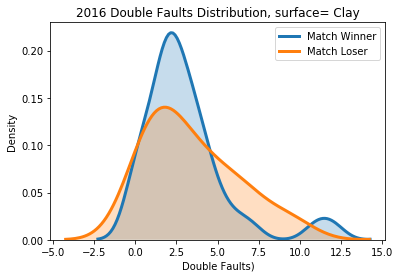

In [268]:
sns.distplot(clay16['w_df'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(clay16['l_df'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 Double Faults Distribution, surface= Clay')
plt.xlabel('Double Faults)')
plt.ylabel('Density')
plt.show()

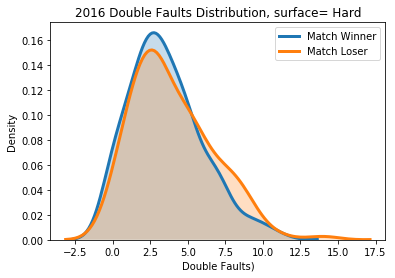

In [269]:
sns.distplot(hard16['w_df'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(hard16['l_df'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 Double Faults Distribution, surface= Hard')
plt.xlabel('Double Faults)')
plt.ylabel('Density')
plt.show()

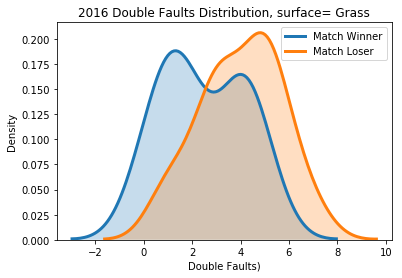

In [270]:
sns.distplot(grass16['w_df'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(grass16['l_df'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 Double Faults Distribution, surface= Grass')
plt.xlabel('Double Faults)')
plt.ylabel('Density')
plt.show()

###  Percent Break Points Saved

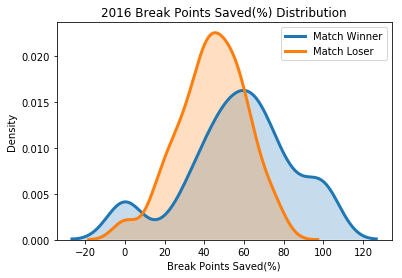

In [288]:
sns.distplot(sample16['w_pctbpSaved'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(sample16['l_pctbpSaved'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 Break Points Saved(%) Distribution')
plt.xlabel('Break Points Saved(%)')
plt.ylabel('Density')
plt.show()

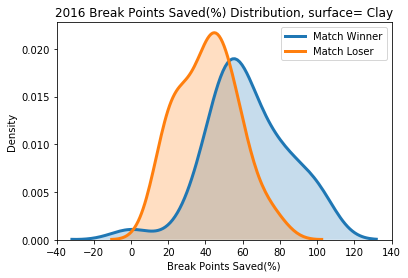

In [287]:
sns.distplot(clay16['w_pctbpSaved'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(clay16['l_pctbpSaved'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 Break Points Saved(%) Distribution, surface= Clay')
plt.xlabel('Break Points Saved(%)')
plt.ylabel('Density')
plt.show()

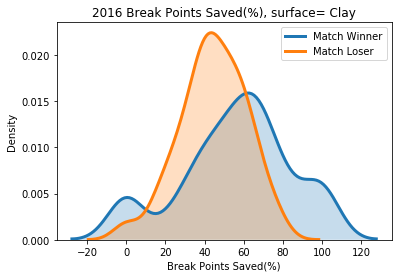

In [286]:
sns.distplot(hard16['w_pctbpSaved'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(hard16['l_pctbpSaved'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 Break Points Saved(%), surface= Clay')
plt.xlabel('Break Points Saved(%)')
plt.ylabel('Density')
plt.show()

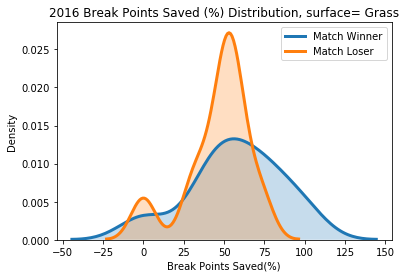

In [284]:
sns.distplot(grass16['w_pctbpSaved'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(grass16['l_pctbpSaved'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 Break Points Saved (%) Distribution, surface= Grass')
plt.xlabel('Break Points Saved(%)')
plt.ylabel('Density')
plt.show()

### 1st Serve In %

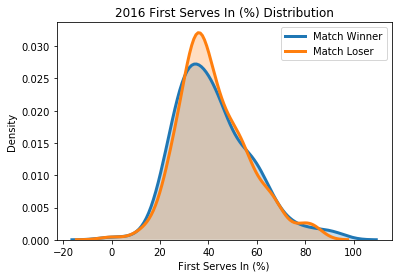

In [283]:
sns.distplot(sample16['w_1stIn'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(sample16['l_1stIn'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 First Serves In (%) Distribution')
plt.xlabel('First Serves In (%)')
plt.ylabel('Density')
plt.show()

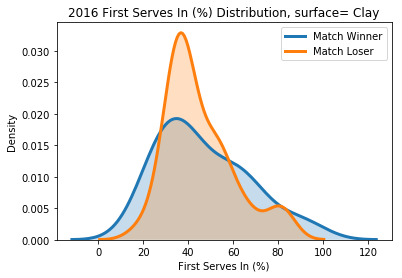

In [289]:
sns.distplot(clay16['w_1stIn'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(clay16['l_1stIn'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 First Serves In (%) Distribution, surface= Clay')
plt.xlabel('First Serves In (%)')
plt.ylabel('Density')
plt.show()

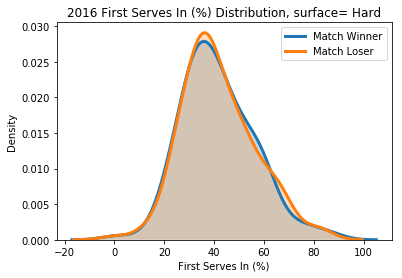

In [290]:
sns.distplot(hard16['w_1stIn'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(hard16['l_1stIn'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 First Serves In (%) Distribution, surface= Hard')
plt.xlabel('First Serves In (%)')
plt.ylabel('Density')
plt.show()

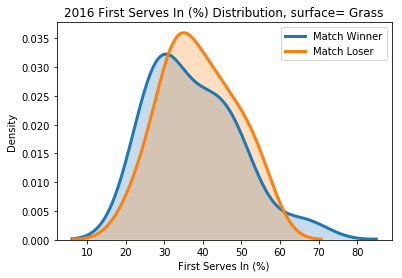

In [292]:
sns.distplot(grass16['w_1stIn'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(grass16['l_1stIn'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 First Serves In (%) Distribution, surface= Grass')
plt.xlabel('First Serves In (%)')
plt.ylabel('Density')
plt.show()

### 1st Serve Win %

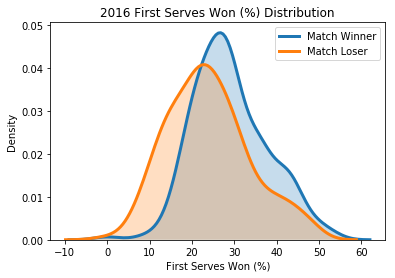

In [293]:
sns.distplot(sample16['w_1stWon'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(sample16['l_1stWon'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 First Serves Won (%) Distribution')
plt.xlabel('First Serves Won (%)')
plt.ylabel('Density')
plt.show()

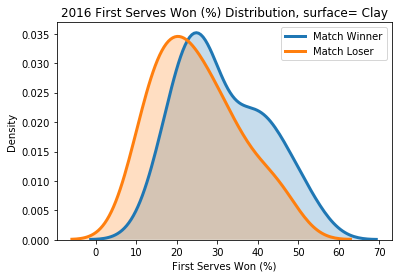

In [294]:
sns.distplot(clay16['w_1stWon'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(clay16['l_1stWon'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 First Serves Won (%) Distribution, surface= Clay')
plt.xlabel('First Serves Won (%)')
plt.ylabel('Density')
plt.show()

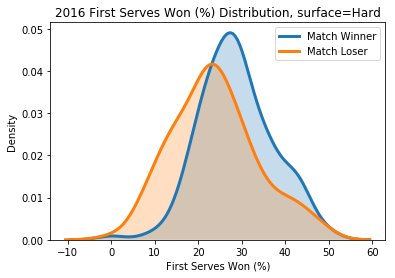

In [295]:
sns.distplot(hard16['w_1stWon'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(hard16['l_1stWon'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 First Serves Won (%) Distribution, surface=Hard')
plt.xlabel('First Serves Won (%)')
plt.ylabel('Density')
plt.show()

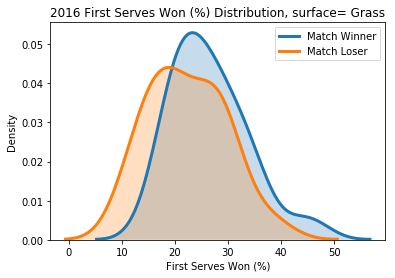

In [296]:
sns.distplot(grass16['w_1stWon'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(grass16['l_1stWon'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 First Serves Won (%) Distribution, surface= Grass')
plt.xlabel('First Serves Won (%)')
plt.ylabel('Density')
plt.show()

### 2nd Serve Win %

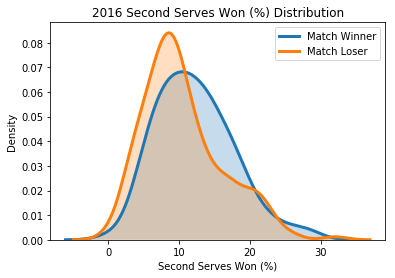

In [458]:
sns.distplot(sample16['w_2ndWon'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(sample16['l_2ndWon'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 Second Serves Won (%) Distribution')
plt.xlabel('Second Serves Won (%)')
plt.ylabel('Density')
plt.show()

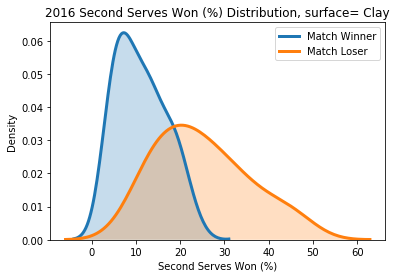

In [298]:
sns.distplot(clay16['w_2ndWon'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(clay16['l_1stWon'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 Second Serves Won (%) Distribution, surface= Clay')
plt.xlabel('Second Serves Won (%)')
plt.ylabel('Density')
plt.show()

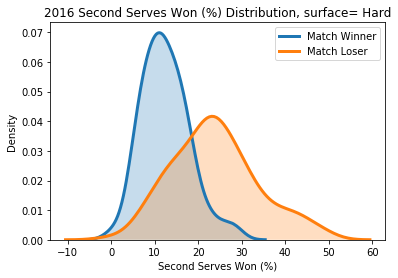

In [299]:
sns.distplot(hard16['w_2ndWon'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(hard16['l_1stWon'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 Second Serves Won (%) Distribution, surface= Hard')
plt.xlabel('Second Serves Won (%)')
plt.ylabel('Density')
plt.show()

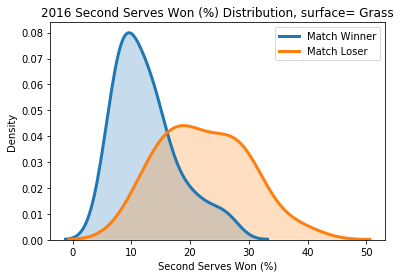

In [301]:
sns.distplot(grass16['w_2ndWon'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(grass16['l_1stWon'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 Second Serves Won (%) Distribution, surface= Grass')
plt.xlabel('Second Serves Won (%)')
plt.ylabel('Density')
plt.show()

## _WTA Determinant of Predictability_

### 12 Month Ranking System

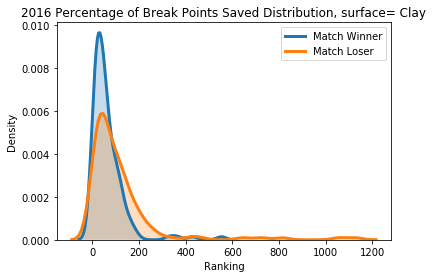

In [276]:
sns.distplot(hard16['winner_rank'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(hard16['loser_rank'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 Percentage of Break Points Saved Distribution, surface= Clay')
plt.xlabel('Ranking')
plt.ylabel('Density')
plt.show()

# Examining Trends across Random Players

In [101]:
playerssample=wta2016df.sample(5)
playerssample.to_csv('../data/clean/player_sample2016.csv',index= False)
playerssample['winner_name']

480            Elina Svitolina
408            Sloane Stephens
2594             Petra Kvitova
90                Saisai Zheng
816     Lourdes Dominguez Lino
Name: winner_name, dtype: object

* I used the _sample_ function was used to find random players to examine trends. The names that were yielded were: __Elina Svitolina, Sloane Stepehens, Saisai Zheng, Petra Kvitova__.

In [459]:
svitolina16= (wta2016df['winner_name'].str.startswith('Elina Svitolina')) | (wta2016df['loser_name']==('Elina Svitolina'))

In [460]:
svitolina2016= wta2016df[svitolina16]
svitolina2016.to_csv('../data/clean/svitolina2016.csv',index= False)

In [461]:
stephens16= (wta2016df['winner_name'].str.startswith('Sloane Stephens')) | (wta2016df['loser_name']==('Sloane Stephens'))
stephens2016= wta2016df[stephens16]
stephens2016.to_csv('../data/clean/stephens2016.csv',index= False)

In [462]:
kvitova16= (wta2016df['winner_name'].str.startswith('Petra Kvitova')) | (wta2016df['loser_name']==('Petra Kvitova'))
kvitova2016= wta2016df[kvitova16]
kvitova2016.to_csv('../data/clean/kvitova2016.csv',index= False)

In [463]:
zheng16= (wta2016df['winner_name'].str.startswith('Saisai Zheng')) | (wta2016df['loser_name']==('Saisai Zheng'))
zheng2016= wta2016df[zheng16]
zheng2016.to_csv('../data/clean/zheng2016.csv',index= False)

In [464]:
dominguezlino16= (wta2016df['winner_name'].str.startswith('Lourdes Dominguez Lino')) | (wta2016df['loser_name']==('Lourdes Dominguez Lino'))
dominguezlino2016= wta2016df[dominguezlino16]
dominguezlino2016.to_csv('../data/clean/dominguezlino2016.csv',index= False)

In [465]:
dominguezlino2016

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,num_sets,l_pctbpSaved,w_pctbpSaved
172,2016-580,Australian Open,Hard,128,G,20160118,121,204431,NaN,NaN,...,106.0,61.0,37.0,22.0,14.0,8.0,12.0,3,66.666667,62.500000
393,2016-M052,Rio de Janeiro,Clay,32,I,20160215,270,201596,2,NaN,...,74.0,41.0,28.0,14.0,11.0,9.0,13.0,2,69.230769,33.333333
410,2016-M004,Acapulco,Hard,32,I,20160222,284,201495,NaN,NaN,...,33.0,13.0,3.0,6.0,6.0,2.0,8.0,2,25.000000,NaN
736,2016-M007,Miami,Hard,128,P,20160321,227,201447,NaN,NaN,...,58.0,32.0,18.0,13.0,10.0,5.0,9.0,2,55.555556,60.000000
777,2016-0804,Charleston,Clay,64,I,20160404,286,201455,NaN,Q,...,52.0,37.0,16.0,5.0,8.0,7.0,13.0,2,53.846154,66.666667
792,2016-0804,Charleston,Clay,64,I,20160404,271,201452,NaN,NaN,...,61.0,39.0,24.0,11.0,9.0,3.0,6.0,3,50.000000,20.000000
816,2016-0804,Charleston,Clay,64,I,20160404,240,201452,NaN,NaN,...,79.0,44.0,27.0,14.0,13.0,2.0,8.0,3,25.000000,73.333333
860,2016-0894,Bogota,Clay,32,I,20160411,289,203500,NaN,NaN,...,72.0,49.0,27.0,9.0,11.0,5.0,12.0,3,41.666667,58.333333
872,2016-0894,Bogota,Clay,32,I,20160411,277,201452,7,NaN,...,113.0,61.0,42.0,24.0,16.0,6.0,11.0,3,54.545455,50.000000
1051,2016-M021,Madrid,Clay,64,P,20160502,249,201662,13,NaN,...,46.0,29.0,14.0,6.0,8.0,3.0,8.0,2,37.500000,NaN


### Examining How above Trends apply to the Sample Players

In [466]:
win_svitolina=svitolina2016['winner_name']=='Elina Svitolina'
loss_svitolina=svitolina2016['loser_name']=='Elina Svitolina'
win_stephens=stephens2016['winner_name']=='Sloane Stephens'
loss_stephens=stephens2016['loser_name']=='Sloane Stephens'
win_kvitova=kvitova2016['winner_name']=='Petra Kvitova'
loss_kvitova=kvitova2016['loser_name']=='Petra Kvitova'
win_zheng=zheng2016['winner_name']=='Saisai Zheng'
loss_zheng=zheng2016['loser_name']=='Saisai Zheng'
win_dominguezlino=dominguezlino2016['winner_name']=='Lourdes Dominguez Lino'
loss_dominguezlino=dominguezlino2016['loser_name']=='Lourdes Dominguez Lino'

##### Elina Svitolina

In [467]:
w_svitolina=svitolina2016[win_svitolina]
w_svitolina.to_csv('../data/clean/w_svitolina.csv',index= False)
l_svitolina=svitolina2016[loss_svitolina]
l_svitolina.to_csv('../data/clean/l_svitolina.csv',index= False)

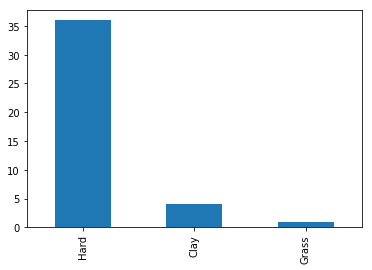

In [468]:
w_svitolina['surface'].value_counts().plot.bar()

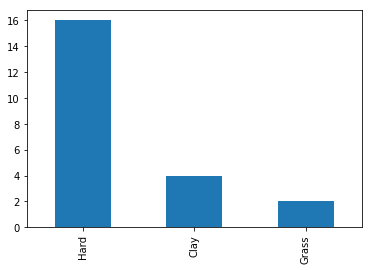

In [469]:
l_svitolina['surface'].value_counts().plot.bar()

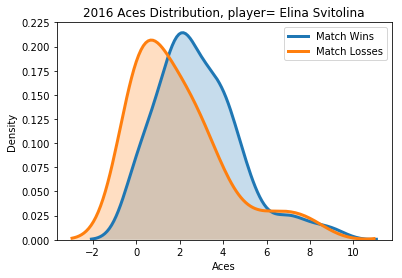

In [470]:
sns.distplot(svitolina2016['w_ace'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Wins")
sns.distplot(svitolina2016['l_ace'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Losses")
plt.title('2016 Aces Distribution, player= Elina Svitolina')
plt.xlabel('Aces')
plt.ylabel('Density')
plt.show()


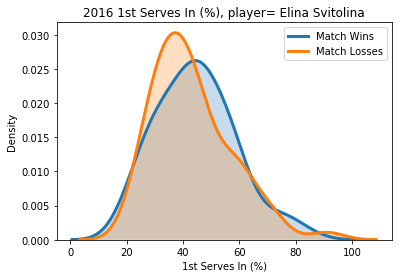

In [471]:
sns.distplot(svitolina2016['w_1stIn'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Wins")
sns.distplot(svitolina2016['l_1stIn'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Losses")
plt.title('2016 1st Serves In (%), player= Elina Svitolina')
plt.xlabel('1st Serves In (%)')
plt.ylabel('Density')
plt.show()

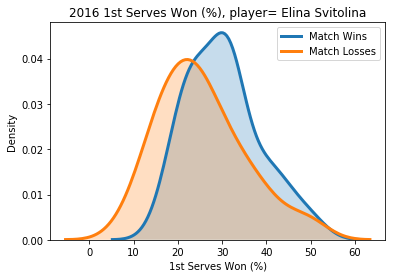

In [472]:
sns.distplot(svitolina2016['w_1stWon'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Wins")
sns.distplot(svitolina2016['l_1stWon'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Losses")
plt.title('2016 1st Serves Won (%), player= Elina Svitolina')
plt.xlabel('1st Serves Won (%)')
plt.ylabel('Density')
plt.show()

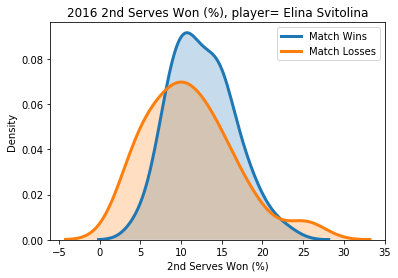

In [473]:
sns.distplot(svitolina2016['w_2ndWon'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Wins")
sns.distplot(svitolina2016['l_2ndWon'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Losses")
plt.title('2016 2nd Serves Won (%), player= Elina Svitolina')
plt.xlabel('2nd Serves Won (%)')
plt.ylabel('Density')
plt.show()

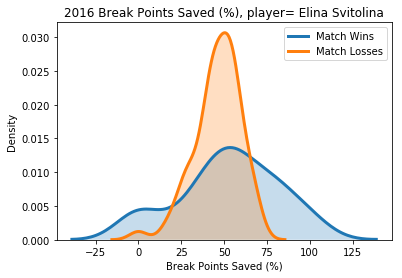

In [474]:
sns.distplot(svitolina2016['w_pctbpSaved'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Wins")
sns.distplot(svitolina2016['l_pctbpSaved'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Losses")
plt.title('2016 Break Points Saved (%), player= Elina Svitolina')
plt.xlabel('Break Points Saved (%)')
plt.ylabel('Density')
plt.show()

##### Petra Kvitova

In [475]:
w_kvitova=kvitova2016[win_kvitova]
w_kvitova.to_csv('../data/clean/w_kvitova.csv',index= False)
l_kvitova=kvitova2016[loss_kvitova]
l_kvitova.to_csv('../data/clean/l_kvitova.csv',index= False)

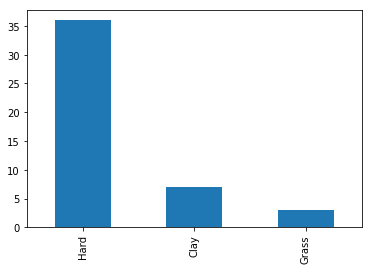

In [476]:
w_kvitova['surface'].value_counts().plot.bar()

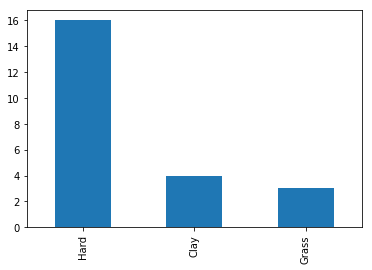

In [477]:
l_kvitova['surface'].value_counts().plot.bar()

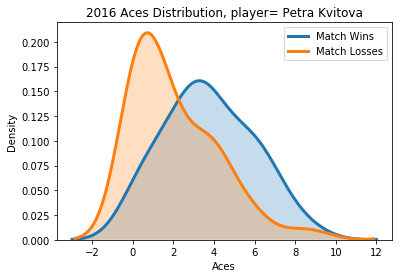

In [478]:
sns.distplot(kvitova2016['w_ace'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Wins")
sns.distplot(kvitova2016['l_ace'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Losses")
plt.title('2016 Aces Distribution, player= Petra Kvitova')
plt.xlabel('Aces')
plt.ylabel('Density')
plt.show()

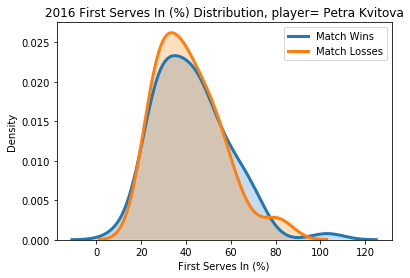

In [479]:
sns.distplot(kvitova2016['w_1stIn'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Wins")
sns.distplot(kvitova2016['l_1stIn'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Losses")
plt.title('2016 First Serves In (%) Distribution, player= Petra Kvitova')
plt.xlabel('First Serves In (%)')
plt.ylabel('Density')
plt.show()

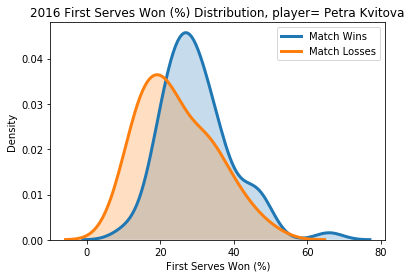

In [480]:
sns.distplot(kvitova2016['w_1stWon'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Wins")
sns.distplot(kvitova2016['l_1stWon'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Losses")
plt.title('2016 First Serves Won (%) Distribution, player= Petra Kvitova')
plt.xlabel('First Serves Won (%)')
plt.ylabel('Density')
plt.show()

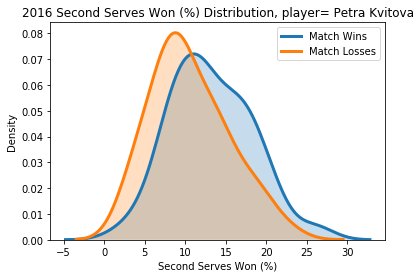

In [481]:
sns.distplot(kvitova2016['w_2ndWon'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Wins")
sns.distplot(kvitova2016['l_2ndWon'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Losses")
plt.title('2016 Second Serves Won (%) Distribution, player= Petra Kvitova')
plt.xlabel('Second Serves Won (%)')
plt.ylabel('Density')
plt.show()

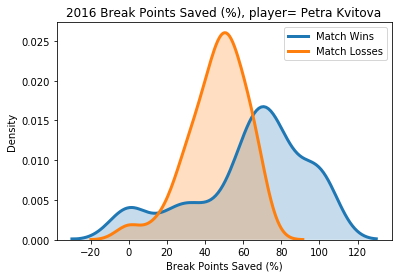

In [482]:
sns.distplot(kvitova2016['w_pctbpSaved'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Wins")
sns.distplot(kvitova2016['l_pctbpSaved'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Losses")
plt.title('2016 Break Points Saved (%), player= Petra Kvitova')
plt.xlabel('Break Points Saved (%)')
plt.ylabel('Density')
plt.show()

##### Lourdes Dominguez Lino

In [483]:
w_dominguezlino=dominguezlino2016[win_dominguezlino]
w_dominguezlino.to_csv('../data/clean/w_dominguezlino.csv',index= False)
l_dominguezlino=kvitova2016[loss_kvitova]
l_dominguezlino.to_csv('../data/clean/l_dominguezlino.csv',index= False)

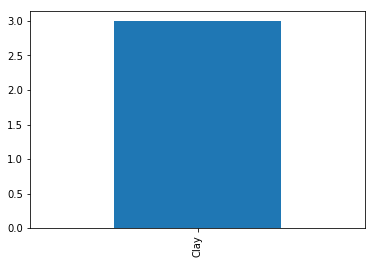

In [484]:
w_dominguezlino['surface'].value_counts().plot.bar()

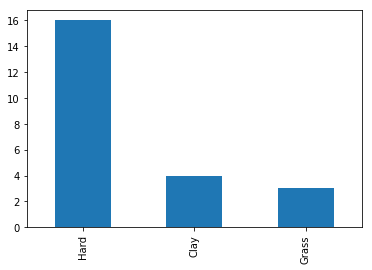

In [485]:
l_dominguezlino['surface'].value_counts().plot.bar()

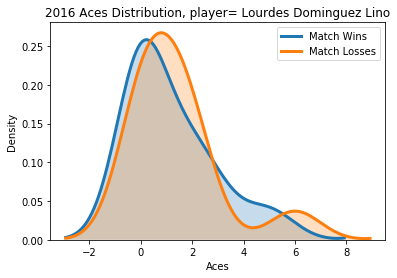

In [486]:
sns.distplot(dominguezlino2016['w_ace'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Wins")
sns.distplot(dominguezlino2016['l_ace'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Losses")
plt.title('2016 Aces Distribution, player= Lourdes Dominguez Lino')
plt.xlabel('Aces')
plt.ylabel('Density')
plt.show()

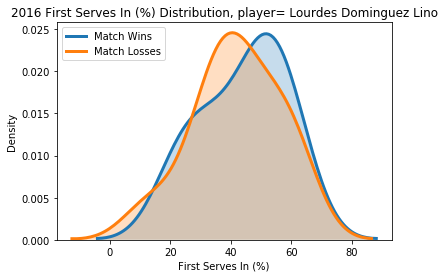

In [487]:
sns.distplot(dominguezlino2016['w_1stIn'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Wins")
sns.distplot(dominguezlino2016['l_1stIn'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Losses")
plt.title('2016 First Serves In (%) Distribution, player= Lourdes Dominguez Lino')
plt.xlabel('First Serves In (%)')
plt.ylabel('Density')
plt.show()

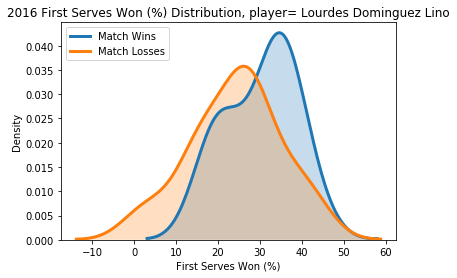

In [488]:
sns.distplot(dominguezlino2016['w_1stWon'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Wins")
sns.distplot(dominguezlino2016['l_1stWon'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Losses")
plt.title('2016 First Serves Won (%) Distribution, player= Lourdes Dominguez Lino')
plt.xlabel('First Serves Won (%)')
plt.ylabel('Density')
plt.show()

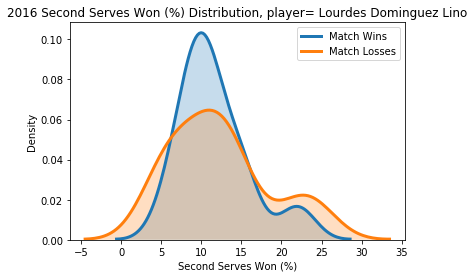

In [489]:
sns.distplot(dominguezlino2016['w_2ndWon'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Wins")
sns.distplot(dominguezlino2016['l_2ndWon'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Losses")
plt.title('2016 Second Serves Won (%) Distribution, player= Lourdes Dominguez Lino')
plt.xlabel('Second Serves Won (%)')
plt.ylabel('Density')
plt.show()

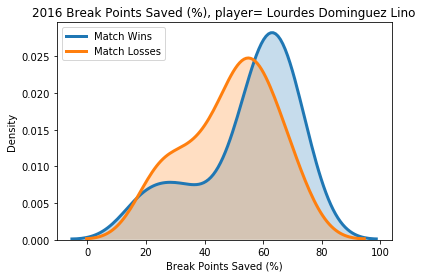

In [490]:
sns.distplot(dominguezlino2016['w_pctbpSaved'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Wins")
sns.distplot(dominguezlino2016['l_pctbpSaved'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Losses")
plt.title('2016 Break Points Saved (%), player= Lourdes Dominguez Lino')
plt.xlabel('Break Points Saved (%)')
plt.ylabel('Density')
plt.show()